## Linear Regression In PyTorch

Now we'll discuss one of the foundational algorithms of machine learning , which is linear regression. We'll create a model that predicts crop yields for Apples and oranges (target variables) by looking at the average temprature , rainfall , and humidity (input variables and features )in a region. 

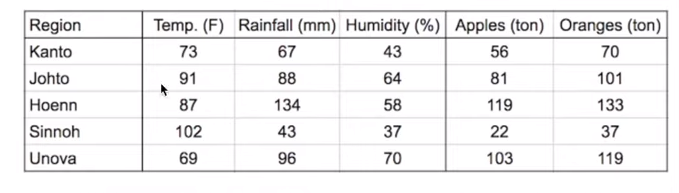

In a linear regression model , each target variable is estimated to be a weighted sum of input variables , offset by some constant known as bias :- 


 

*  Yield Apple :- w11 * temp + w12 * rainfall + w13 * humidity + b1
*  Yield Orange :- w21 * temp + w22 * rainfall + w22 * rainfall + w23 * humidity + b2

The learning part of a linear regression is to figure our a set of weights w11 , w12 , ... , w23 , b2 and b2 , by looking at the training data , to make accurate predictions for new data (i.e to predict the yields for apples and oranges in a new region using the average temprature , Rainfall and humidity) This is done by adjusting weights slighly many times to amke better predictions using an optimizing technique using an optimizing technique called gradient descent. 

# Linear Regression From Scratch

# Training data :- 
The training data can be represented using 2 matrices , inputs and targets , each with one row per observation and one column per variable.

In [ ]:
# Inputs (temp , rainfall , humidity)
import numpy as np
inputs = np.array([
                   [73 , 67 , 43],
                   [91 , 88 , 64],
                   [87 , 134 , 58],
                   [102 , 43 , 37],
                   [69 , 96 , 70]
] , dtype = 'float32')
# targets (apples , oranges )
targets = np.array([
                    [56 , 70],
                    [81 , 101],
                    [119 , 133,],
                    [22 , 37],
                    [103 , 119]
                    
                    ] , dtype = 'float32')


We have separated the input and target variables because we'll operate on them separately. Also we've created numpy arrays , because this is typically how we work with training data , read some csv files as numpy arrays , do some processing and then convert to PyTorch tensors as follows

In [ ]:
# Convert inputs and targets to tensor
import torch
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


The weights and biases (w11 , w12 , ..., w23 , b1 and b2) can also be represented as matrices initialized as random values. The first row of w and the first elements of b are used to predict the first target variable i.e yield of apples and similarly the second for oranges

In [ ]:
# Weights and Biases
w = torch.rand(2 , 3 , requires_grad = True)
b = torch.rand(2 , requires_grad = True)
print(w)
print(b)

tensor([[0.7713, 0.7594, 0.1819],
        [0.8878, 0.5481, 0.1278]], requires_grad=True)
tensor([0.8306, 0.6351], requires_grad=True)


Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b

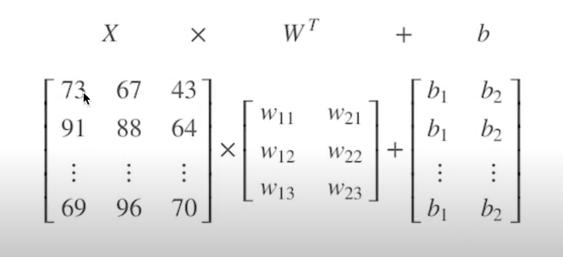

In [ ]:
# so we can define our model as follows
def model(x):
  return x @ w.t() + b

@ represents a matrix multiplication in PyTorch and the .t method returns the transpose of the tensor. 

The matrix obtained by passing the input data in to the model is a set of predictions for the target variables


In [ ]:
# Generate Predictions 
preds = model(inputs)
print("Predictions by the model = {}".format(preds))
print(preds.shape)

Predictions by the model = tensor([[115.8402, 107.6585],
        [149.4915, 137.8315],
        [180.2494, 158.7251],
        [118.8909, 119.4837],
        [139.6890, 123.4515]], grad_fn=<AddBackward0>)
torch.Size([5, 2])


In [ ]:
# Let's compare the predictions of our model with the actual targets
print(targets)
print(targets.shape)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
torch.Size([5, 2])


we can see there's a huge difference between predictions of our model and the actual values of the target variables obviously , this is because we've initialized our model with random weights and biases and we can't expect to just work

# Loss Functions

Before we improve our model we need a way to evaluate how well our model is performing , we can compare the model's prediction with the actual targets using the following method



*   calculate the difference between the two matrices (preds and targets)
*   Square all elements of the difference matrix to remove negative values
*   calculate the average of the elements in the resulting matrix




In [ ]:
def mse(x , y):
  diff = x - y
  count = diff.numel()
  sum_squaring_differences = torch.sum(diff * diff)
  return sum_squaring_differences/count

torch.sum returns the sum of all elements in a tensor and the .numel() method returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model

In [ ]:
# compute the loss
loss = mse(preds , targets)
print(loss)

tensor(3301.7219, grad_fn=<DivBackward0>)


# Compute Gradients

With PyTorch we can automatically compute the gradient or the derivative of the loss with respect to the weights and biases , because they have requires_grad to True

In [ ]:
# compute the gradients
loss.backward()

The gradients are stored in .grad property of the respective tensors , note that the derivative of the loss with respect to the weights matrx itself a matrix , with the same dimensions.

In [ ]:
print(w)
print(b)
print(w.grad)
print(b.grad)

tensor([[0.7713, 0.7594, 0.1819],
        [0.8878, 0.5481, 0.1278]], requires_grad=True)
tensor([0.8306, 0.6351], requires_grad=True)
tensor([[5668.8345, 5186.4839, 3332.4490],
        [3411.8616, 2637.1194, 1766.4176]])
tensor([64.6322, 37.4301])


Before we proceed , we reset the gradients to zero by calling .zero_() method. We need to do this because PyTorch accumulates gradients i.e the next time we call backward on the loss , the new gradient values will get added to the existing gradient values. 

In [ ]:
print(w.grad.zero_())
print(w.grad.zero_())

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Adjust Weights and Biases Using Gradient Descent 

we will reduce the loss and improve our model using the gradient descent optimization algorithm


1.   Generate Predictions
2.   Calculate the loss
3.   Compute gradients w.r.t the weights and biases
4.   Adjust the weights by subtracting a small quantity proportional to the gradient
5.   Reset the gradients to zero


In [ ]:
# Generate Predictions
predictions = model(inputs)
print(predictions)

tensor([[115.8402, 107.6585],
        [149.4915, 137.8315],
        [180.2494, 158.7251],
        [118.8909, 119.4837],
        [139.6890, 123.4515]], grad_fn=<AddBackward0>)


In [ ]:
# Computing the loss
loss = mse(predictions , targets)
print(loss)

tensor(3301.7219, grad_fn=<DivBackward0>)


In [ ]:
# Compute the gradients 
# loss.backward()  # computing the gradient for the second time causes an error , so we will comment it
print(w.grad)
print(b.grad)

tensor([[5668.8345, 5186.4839, 3332.4490],
        [3411.8616, 2637.1194, 1766.4176]])
tensor([193.8966, 112.2902])


In [ ]:
# Adjust the weights and the rest gradients 
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()

We use torch.no_grad to indicate to PyTorch that we shouldn't track , calculate or modify gradients while updating the weights and biases

# Train For Multiple Epochs

To reduce the loss further , we can repeat the process of adjusting the weights and biases using the gradients multiple times , each iteration is called an epochs , let's train the model for 100 epochs

In [ ]:
# Train for 100 epochs
for epochs in range(100):
  preds = model(inputs)
  loss = mse(preds , targets)
  loss.backward()
  with torch.no_grad():
    w-= w.grad*1e-5
    w-= w.grad*1e-5
    w.grad.zero_()
    w.grad.zero_()
# calculate the loss after 100 iteratin
preds = model(inputs)
print(preds)

tensor([[ 59.9124,  73.4591],
        [ 79.9448,  97.5292],
        [119.4239, 135.0402],
        [ 35.8306,  54.1774],
        [ 89.5410, 103.7831]], grad_fn=<AddBackward0>)


In [ ]:
# print the targets to compare
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
# compute the loss
loss = mse(preds , targets)
print(loss)

tensor(94.3818, grad_fn=<DivBackward0>)


# Linear Regression Using PyTorch Built In Functions

The model and training process above were implemented using basic matrix operations. But since this such a common pattern , PyTorch has several built in functions and classes to make it easy to create and train models

In [ ]:
# As before we represent the inputs and targets and matrices
inputs = np.array([
                   [73 , 67 , 43] , [91 , 88 , 64] , [87 , 134 , 58],
                   [102 , 43 , 37] ,[69 , 96 , 70],[73 , 67 , 43],
                   [91 , 88 , 64] , [87 , 134 , 58] ,[102 , 43 , 37],
                   [69 , 96 , 70] ,[73 , 67 , 43] , [91 , 88 , 64],
                   [87 , 134 , 58] , [102 , 43 , 37] , [69 , 96 , 70]
] , dtype = 'float32')
targets = np.array([
                    [56 , 70] , [81 ,101],[119 ,133],
                    [22,37] , [103 , 119] , [56 , 70],
                    [81 , 101] , [119 ,133] , [22 , 37],
                    [103 , 119] , [56 ,70] , [81 , 101],
                    [119 , 133] , [22 ,37] , [103 , 119]
] , dtype = 'float32')


In [ ]:
# Changing From Numpy To Tensor
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(inputs.shape)
print(targets)
print(targets.shape)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
torch.Size([15, 3])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
torch.Size([15, 2])


# Dataset and DataLoader

we'll create a TensorDataset , which allows access from inputs and targets as tuples and provides standard API's for working with many different types of datasets in PyTorch

In [ ]:
from torch.utils.data import TensorDataset
train_data = TensorDataset(inputs , targets)
train_data[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
for training in train_data:
  print(training)

(tensor([73., 67., 43.]), tensor([56., 70.]))
(tensor([91., 88., 64.]), tensor([ 81., 101.]))
(tensor([ 87., 134.,  58.]), tensor([119., 133.]))
(tensor([102.,  43.,  37.]), tensor([22., 37.]))
(tensor([69., 96., 70.]), tensor([103., 119.]))
(tensor([73., 67., 43.]), tensor([56., 70.]))
(tensor([91., 88., 64.]), tensor([ 81., 101.]))
(tensor([ 87., 134.,  58.]), tensor([119., 133.]))
(tensor([102.,  43.,  37.]), tensor([22., 37.]))
(tensor([69., 96., 70.]), tensor([103., 119.]))
(tensor([73., 67., 43.]), tensor([56., 70.]))
(tensor([91., 88., 64.]), tensor([ 81., 101.]))
(tensor([ 87., 134.,  58.]), tensor([119., 133.]))
(tensor([102.,  43.,  37.]), tensor([22., 37.]))
(tensor([69., 96., 70.]), tensor([103., 119.]))


The tensordataset allows us to access a small section of the training data using the array indexing notation [0:3] , it returns a tuple(or pair ) , in which the first element contains the input variables for the selected rows and the second contains the targets.

We will also create a DataLoader , which can split the data in to batches of a pre-defined size while training , it also provides other utilities like shuffling and random sampling of the data

In [ ]:
# Define the data loader
batch_size = 5
train_load = torch.utils.data.DataLoader(train_data , batch_size = batch_size , shuffle = True)
for xb , yb in train_load:
  print(xb , yb)
  break # to see only one batch

tensor([[102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]) tensor([[ 22.,  37.],
        [ 56.,  70.],
        [ 81., 101.],
        [ 81., 101.],
        [119., 133.]])


In [ ]:
# if we want to see the entire batch
for xb , yb  in train_load:
  print(xb , yb)

tensor([[ 69.,  96.,  70.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.]]) tensor([[103., 119.],
        [ 22.,  37.],
        [119., 133.],
        [119., 133.],
        [ 22.,  37.]])
tensor([[ 73.,  67.,  43.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.]]) tensor([[ 56.,  70.],
        [103., 119.],
        [ 81., 101.],
        [ 22.,  37.],
        [119., 133.]])
tensor([[73., 67., 43.],
        [91., 88., 64.],
        [91., 88., 64.],
        [73., 67., 43.],
        [69., 96., 70.]]) tensor([[ 56.,  70.],
        [ 81., 101.],
        [ 81., 101.],
        [ 56.,  70.],
        [103., 119.]])


In each iteration , the data laoder returns one batch of data , with the given batch size , if shuffle is set to True. It shuffles the training data before creating batches shuffling helps randomize the input to the optimization algorithm , which can lead to faster reduction in the loss

# Building A Model

Instead of initializing the weights and biases manually , we can define the model using the nn.Linear class from PyTorch , which does it all automatically

In [ ]:
model = torch.nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5123, -0.1992, -0.5033],
        [ 0.2915, -0.1386,  0.0038]], requires_grad=True)
Parameter containing:
tensor([-0.5520,  0.3071], requires_grad=True)


PyTorch models also have a helpful .parameters methid which returns a list containing all the weights and bias matrices present in the model. For our linear regression model , we have one weight matrix and one bias matrix

In [ ]:
for params in model.parameters():
  print(params)

Parameter containing:
tensor([[ 0.5123, -0.1992, -0.5033],
        [ 0.2915, -0.1386,  0.0038]], requires_grad=True)
Parameter containing:
tensor([-0.5520,  0.3071], requires_grad=True)


# Loss Function

instead of defining a loss function manually we can use the built in loss function(mse_loss)

In [ ]:
import torch.nn as nn
mse_loss= nn.MSELoss()
loss = mse_loss(model(inputs) , targets)
print(loss)

tensor(8139.7974, grad_fn=<MseLossBackward0>)


# Optimizers

Instead of manually manipulating the models weights and biases using gradients , we can use the optimizer optim.SGD() , SGD stands for stochiastic gradient descent. It is called a stochiastic because samples are selected in batches

In [81]:
opt = torch.optim.SGD(model.parameters() , lr = 1e-5)

Note that model.parameters() is passed as an argument to optim.SGD() , so the optimizer knows which matrices should be modified during the update step. 

# Train The Model

We are now ready to train the model , we'll follow the exact same process to implement gradient descent. 



1. Generate Predictiond 
2. Calculate the loss
3. Compute gradients w.r.t weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient 
5. Reset the gradient to zero

In [95]:
# utility function to train the model
def fit(num_epochs , model , mse_loss , opt):
  # Repeat for a given number of epochs
  for epoch in range(num_epochs):
    for xb,yb in train_load:
      pred = model(xb)
      # calculate the loss
      loss = mse_loss(pred , yb)
      # compute gradients
      loss.backward()
      # update the parameters using gradients
      opt.step()
      # Reset the gradients to zero
      opt.zero_grad()

    #print("Print the progress")
    if(epoch+1)%10==0:
      print('Epoch [{}/{}], loss:{:.4f}'.format(epoch+1 , num_epochs , loss.item()))

# calling the function
fit(100 , model ,mse_loss , opt)

Epoch [10/100], loss:3.5287
Epoch [20/100], loss:5.3666
Epoch [30/100], loss:2.1921
Epoch [40/100], loss:3.1215
Epoch [50/100], loss:2.2274
Epoch [60/100], loss:2.9142
Epoch [70/100], loss:3.6826
Epoch [80/100], loss:2.5360
Epoch [90/100], loss:5.5369
Epoch [100/100], loss:2.7915


In [96]:
# now we can actually see the prediction after 100 epochs
preds = model(inputs)
print(preds)

tensor([[ 57.1536,  70.4136],
        [ 81.0872,  99.8387],
        [120.9339, 134.4533],
        [ 21.6957,  37.4155],
        [ 99.5284, 117.5349],
        [ 57.1536,  70.4136],
        [ 81.0872,  99.8387],
        [120.9339, 134.4533],
        [ 21.6957,  37.4155],
        [ 99.5284, 117.5349],
        [ 57.1536,  70.4136],
        [ 81.0872,  99.8387],
        [120.9339, 134.4533],
        [ 21.6957,  37.4155],
        [ 99.5284, 117.5349]], grad_fn=<AddmmBackward0>)


In [97]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [98]:
# compute the loss after 100 epochs
mse_loss(preds , targets)

tensor(2.3174, grad_fn=<MseLossBackward0>)

Some things to note above:-


* We use the dataloader defined earlier to get batches of data for every iteration  
* Instead of updating parameters (weights and biases) manually , we use opt.step to perform the update and opt.zero_grad() to reset the gradients to zero

